<a href="https://colab.research.google.com/github/dots13/RohlikSalesForecastingChallengeKaggle/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import holidays

In [2]:
df_sales_train = pd.read_csv('sales_train.csv')

In [3]:
df_sales_train.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


In [4]:
df_sales_train

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007414,4941,2023-06-21,Prague_1,9988.0,26.56,34.06,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
4007415,4941,2023-06-24,Prague_1,8518.0,27.42,34.06,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
4007416,4941,2023-06-23,Prague_1,10424.0,33.39,34.06,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
4007417,4941,2023-06-22,Prague_1,10342.0,22.88,34.06,1.00,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0


In [5]:
df_sales_train.warehouse.value_counts()

,count
warehouse,
Prague_1,780566
Prague_3,779655
Prague_2,770709
Brno_1,643637
Budapest_1,574582
Munich_1,259333
Frankfurt_1,198937


In [6]:
df_sales_train['date'] = pd.to_datetime(df_sales_train['date'])
df_sales_train.sort_values(by='date', inplace=True)
df_sales_train.head(20)

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
193957,2346,2020-08-01,Prague_1,4086.0,55.12,25.29,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2876778,2052,2020-08-01,Prague_2,2424.0,4.41,29.45,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1361601,619,2020-08-01,Prague_1,4111.0,327.07,40.01,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
472226,505,2020-08-01,Prague_2,2424.0,43.60,58.73,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
766156,1531,2020-08-01,Prague_3,2416.0,4.44,19.84,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3669582,3082,2020-08-01,Brno_1,4797.0,26.71,37.50,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2329885,4058,2020-08-01,Prague_2,2424.0,4.84,20.45,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
570925,2398,2020-08-01,Prague_3,2466.0,27.44,9.41,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2154059,729,2020-08-01,Brno_1,4797.0,218.99,41.45,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1636734,2405,2020-08-01,Prague_3,2466.0,2.70,95.96,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [7]:
unique_products = df_sales_train.groupby("warehouse")["unique_id"].nunique().reset_index()
unique_products.columns = ["warehouse", "unique_products"]

fig1 = px.bar(unique_products, x="warehouse", y="unique_products", title="Unique Products per Warehouse")
fig1.show()

In [8]:
df_sales_train["month"] = df_sales_train["date"].dt.to_period("M")
monthly_sales = df_sales_train.groupby(["month", "warehouse"])["sales"].sum().reset_index()

monthly_sales["month"] = monthly_sales["month"].astype(str)

fig2 = px.line(monthly_sales, x="month", y="sales", color="warehouse", title="Monthly Sales per Warehouse")
fig2.show()

In [11]:
df_inventory = pd.read_csv('inventory.csv')
df_inventory.head()

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1


In [12]:
df_sales_train_inventory = pd.merge(
    df_sales_train,
    df_inventory[['unique_id',	'product_unique_id']],
    how='left',
    on='unique_id'
    )

In [13]:
df_sales_train_inventory.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,month,product_unique_id
0,2346,2020-08-01,Prague_1,4086.0,55.12,25.29,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,1172
1,2052,2020-08-01,Prague_2,2424.0,4.41,29.45,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,1039
2,619,2020-08-01,Prague_1,4111.0,327.07,40.01,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,316
3,505,2020-08-01,Prague_2,2424.0,43.60,58.73,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,263
4,1531,2020-08-01,Prague_3,2416.0,4.44,19.84,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,778


In [14]:
warehouse_counts = df_sales_train_inventory.groupby("product_unique_id")["warehouse"].nunique()
#common_products = warehouse_counts[warehouse_counts == df_sales_train_inventory["warehouse"].nunique()].index

In [15]:
warehouse_counts.sort_values(ascending=False)[10:20]

,warehouse
product_unique_id,
1214,4
1219,4
1220,4
1223,4
1232,4
1240,4
1253,4
1551,4
1257,4


In [16]:
selected_product = 1188
df_product = df_sales_train_inventory[
              df_sales_train_inventory["product_unique_id"] == selected_product
              ]

monthly_sales = df_product.groupby(["month", "warehouse"])["sales"].sum().reset_index()
monthly_sales["month"] = monthly_sales["month"].astype(str)

fig1 = px.line(monthly_sales,
               x="month",
               y="sales",
               color="warehouse",
               title=f"Monthly Sales per Warehouse for Product Unique ID {selected_product}"
               )
fig1.show()

In [17]:
df_inventory[df_inventory["product_unique_id"] == 1188]

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
1583,2388,1188,Tomato_48,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_5,Fruit and vegetable_L4_28,Prague_3
1743,2387,1188,Tomato_48,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_5,Fruit and vegetable_L4_28,Prague_1
4890,2386,1188,Tomato_48,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_5,Fruit and vegetable_L4_28,Prague_2
5208,2385,1188,Tomato_48,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_5,Fruit and vegetable_L4_28,Brno_1


In [18]:
df_inventory[df_inventory['name'] == 'Tomato_48']

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
1583,2388,1188,Tomato_48,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_5,Fruit and vegetable_L4_28,Prague_3
1743,2387,1188,Tomato_48,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_5,Fruit and vegetable_L4_28,Prague_1
4890,2386,1188,Tomato_48,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_5,Fruit and vegetable_L4_28,Prague_2
5208,2385,1188,Tomato_48,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_5,Fruit and vegetable_L4_28,Brno_1


In [19]:
product_unique_id_tomato = df_inventory[df_inventory['name'].str.contains('Tomato')]['product_unique_id']

In [20]:
df_sales_tomato = df_sales_train_inventory[
    df_sales_train_inventory.product_unique_id.isin(product_unique_id_tomato)
    ]
monthly_sales_tomato = df_sales_tomato.groupby(["month", "warehouse"])["sales"].sum().reset_index()
monthly_sales_tomato["month"] =monthly_sales_tomato["month"].astype(str)

fig1 = px.line(monthly_sales_tomato,
               x="month",
               y="sales",
               color="warehouse",
               title=f"Monthly Sales per Warehouse for Product Unique ID {selected_product}"
               )
fig1.show()

In [21]:
selected_product = 1219
df_product = df_sales_train_inventory[
              df_sales_train_inventory["product_unique_id"] == selected_product
              ]

monthly_sales = df_product.groupby(["month", "warehouse"])["sales"].sum().reset_index()
monthly_sales["month"] = monthly_sales["month"].astype(str)

fig1 = px.line(monthly_sales,
               x="month",
               y="sales",
               color="warehouse",
               title=f"Monthly Sales per Warehouse for Product Unique ID {selected_product}"
               )
fig1.show()

In [22]:
df_inventory[df_inventory["product_unique_id"] == 1219]

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
1634,2441,1219,Turkey_10,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_32,Meat and fish_L4_7,Prague_1
3048,2442,1219,Turkey_10,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_32,Meat and fish_L4_7,Brno_1
4487,2443,1219,Turkey_10,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_32,Meat and fish_L4_7,Prague_3
4973,2444,1219,Turkey_10,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_32,Meat and fish_L4_7,Prague_2


In [23]:
product_unique_id_turkey = df_inventory[df_inventory['name'].str.contains('Turkey')]['product_unique_id']

In [24]:
df_sales_turkey = df_sales_train_inventory[
    df_sales_train_inventory.product_unique_id.isin(product_unique_id_turkey)
    ]
monthly_sales_turkey = df_sales_turkey.groupby(["month", "warehouse"])["sales"].sum().reset_index()
monthly_sales_turkey["month"] =monthly_sales_turkey["month"].astype(str)

fig1 = px.line(monthly_sales_turkey,
               x="month",
               y="sales",
               color="warehouse",
               title=f"Monthly Sales per Warehouse for Product Unique ID {selected_product}"
               )
fig1.show()

In [25]:
df_inventory = df_inventory.rename(columns={'warehouse': 'warehouse_inventory'})
df_sales_train_inventory_extra = pd.merge(
    df_sales_train,
    df_inventory[['unique_id',	'product_unique_id', 'L1_category_name_en', 'warehouse_inventory']],
    how='left',
    on='unique_id'
    )

In [26]:
df_sales_train_inventory_extra[df_sales_train_inventory_extra.warehouse != df_sales_train_inventory_extra.warehouse_inventory]

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,month,product_unique_id,L1_category_name_en,warehouse_inventory


In [27]:
df_sales_train_inventory_extra

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount,month,product_unique_id,L1_category_name_en,warehouse_inventory
0,2346,2020-08-01,Prague_1,4086.0,55.12,25.29,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,1172,Bakery,Prague_1
1,2052,2020-08-01,Prague_2,2424.0,4.41,29.45,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,1039,Fruit and vegetable,Prague_2
2,619,2020-08-01,Prague_1,4111.0,327.07,40.01,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,316,Fruit and vegetable,Prague_1
3,505,2020-08-01,Prague_2,2424.0,43.60,58.73,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,263,Fruit and vegetable,Prague_2
4,1531,2020-08-01,Prague_3,2416.0,4.44,19.84,0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-08,778,Bakery,Prague_3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007414,5033,2024-06-02,Brno_1,8091.0,16.12,57.99,0.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06,2465,Fruit and vegetable,Brno_1
4007415,342,2024-06-02,Prague_2,5753.0,274.29,39.71,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06,174,Fruit and vegetable,Prague_2
4007416,497,2024-06-02,Prague_3,5177.0,16.92,14.57,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06,258,Fruit and vegetable,Prague_3
4007417,1561,2024-06-02,Brno_1,8091.0,67.70,54.27,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06,793,Bakery,Brno_1


In [28]:
df_group_warehouse_extra = df_sales_train_inventory_extra.groupby(["month", "warehouse", "L1_category_name_en"])["sales"].sum().reset_index()

In [29]:
df_group_warehouse_extra

,month,warehouse,L1_category_name_en,sales
0,2020-08,Brno_1,Bakery,654241.30
1,2020-08,Brno_1,Fruit and vegetable,774592.06
2,2020-08,Brno_1,Meat and fish,52882.53
3,2020-08,Budapest_1,Bakery,337399.15
4,2020-08,Budapest_1,Fruit and vegetable,647522.21
...,...,...,...,...
901,2024-06,Prague_2,Fruit and vegetable,56579.93
902,2024-06,Prague_2,Meat and fish,4650.22
903,2024-06,Prague_3,Bakery,45901.64
904,2024-06,Prague_3,Fruit and vegetable,49376.50


In [30]:
df_group_warehouse_extra['month'] = df_group_warehouse_extra['month'].dt.to_timestamp()

fig = px.line(
    df_group_warehouse_extra,
    x="month",
    y="sales",
    color="L1_category_name_en",  # Different lines for each category
    facet_row="warehouse",  # Separate plot per warehouse
    title="Sales Trends by Warehouse and Category",
    labels={"sales": "Sales", "month": "Month", "L1_category_name_en": "Category"},
    markers=True
)

fig.update_layout(
    height=1500,  # Increase height to fit all charts
    width=800,
    showlegend=True
)

fig.show()

In [31]:
fig = px.line(
    df_group_warehouse_extra,
    x="month",
    y="sales",
    color="warehouse",  # Different lines for each category
    facet_row="L1_category_name_en",  # Separate plot per warehouse
    title="Sales Trends by Warehouse and Category",
    labels={"sales": "Sales", "month": "Month", "L1_category_name_en": "Category"},
    markers=True
)

fig.update_layout(
    height=1500,  # Increase height to fit all charts
    width=800,
    showlegend=True
)

fig.show()

In [32]:
df_sales_train_inventory_extra["year"] = df_sales_train_inventory_extra["date"].dt.to_period("Y")
df_sales_train_inventory_extra['month_num'] = df_sales_train_inventory_extra['month'].dt.month

In [33]:
df_sales_heatmap = df_sales_train_inventory_extra.groupby(["warehouse", "year", "month_num"])["sales"].sum().reset_index()

In [34]:
warehouses = ['Brno_1',
              'Prague_1',
              'Prague_2',
              'Prague_3',
              'Budapest_1',
              'Frankfurt_1',
              'Munich_1',
              ]

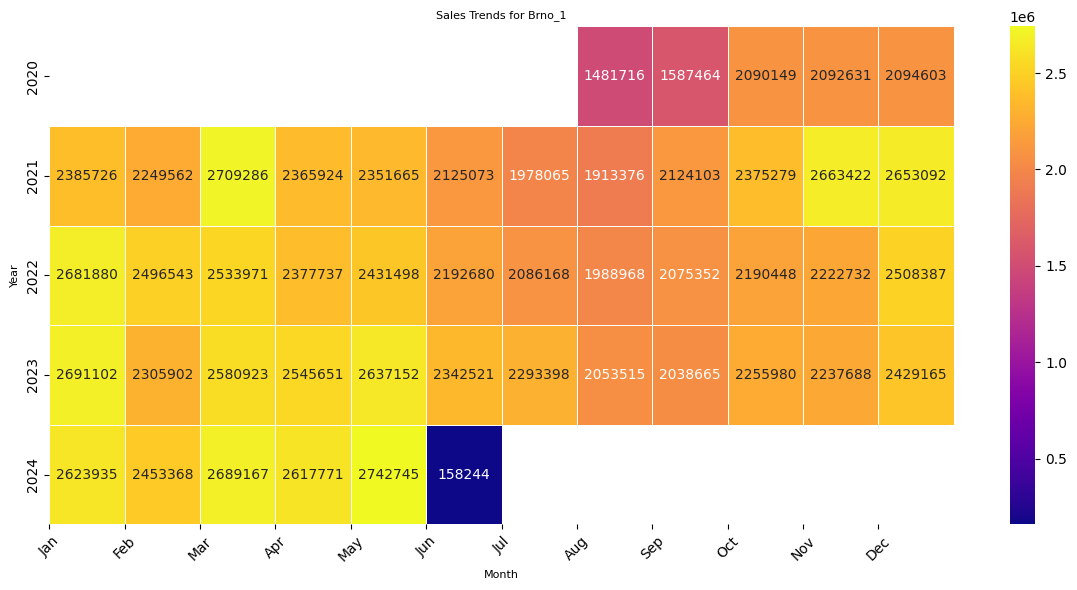

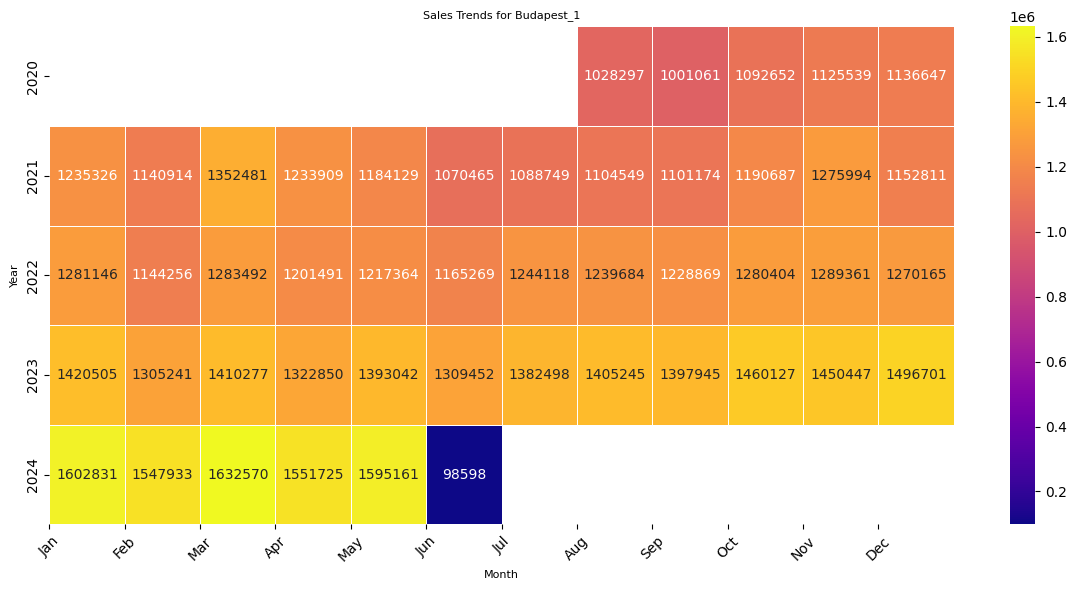

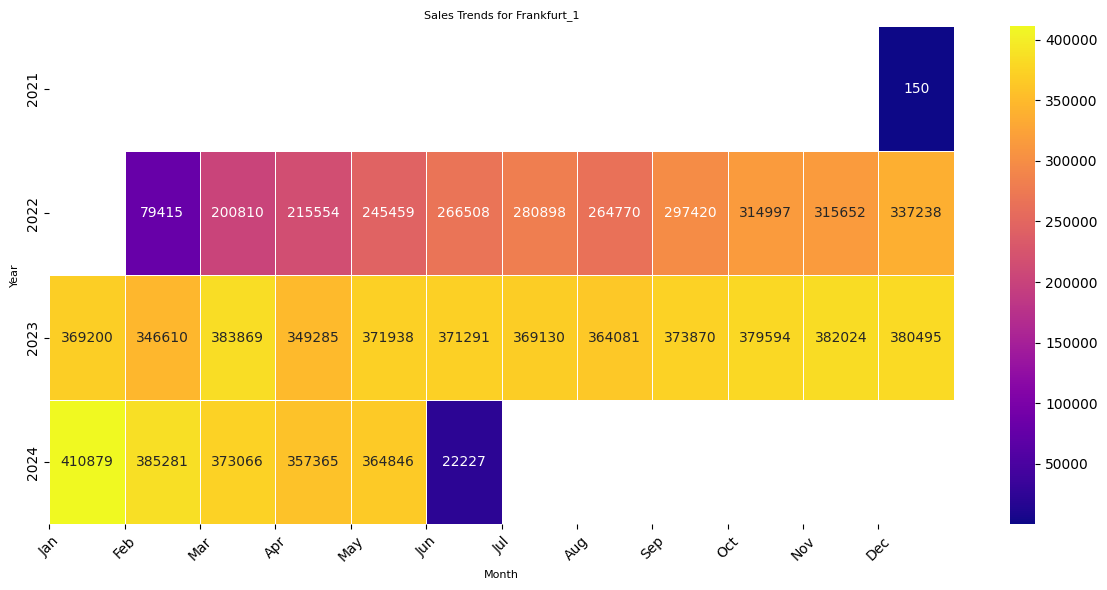

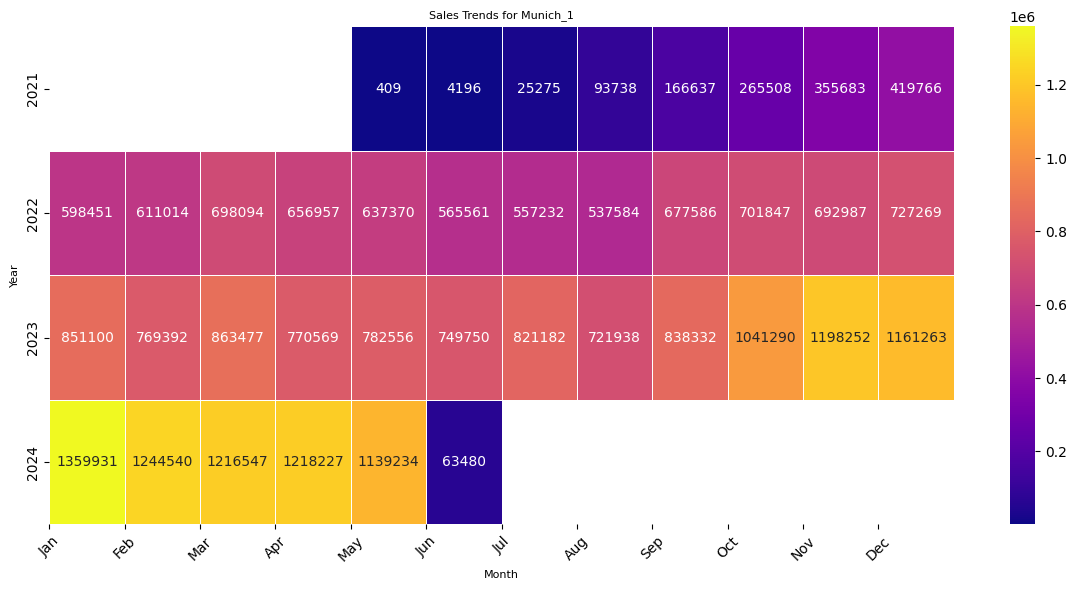

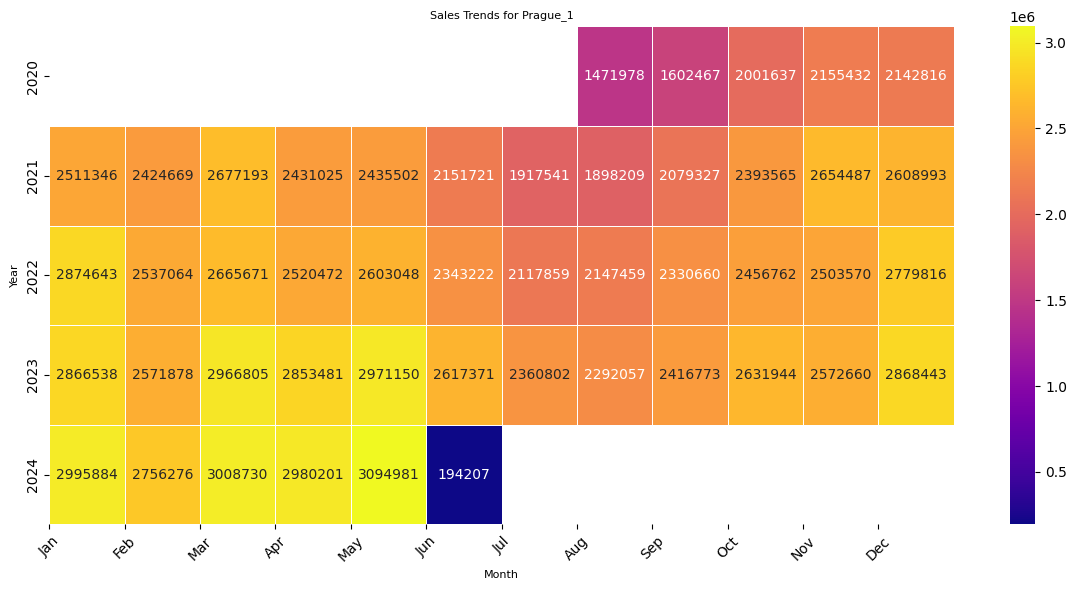

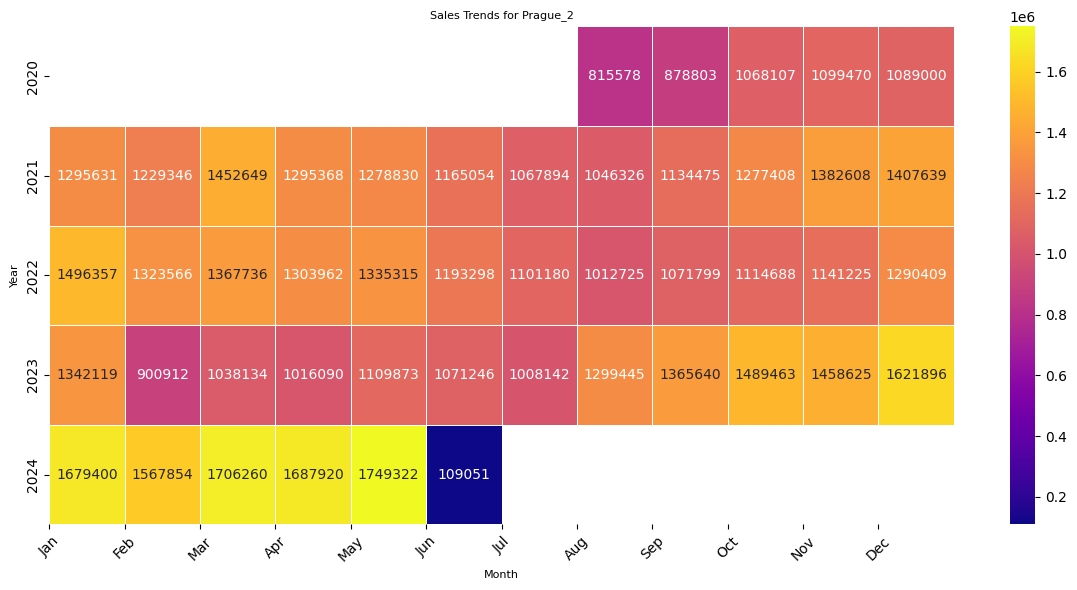

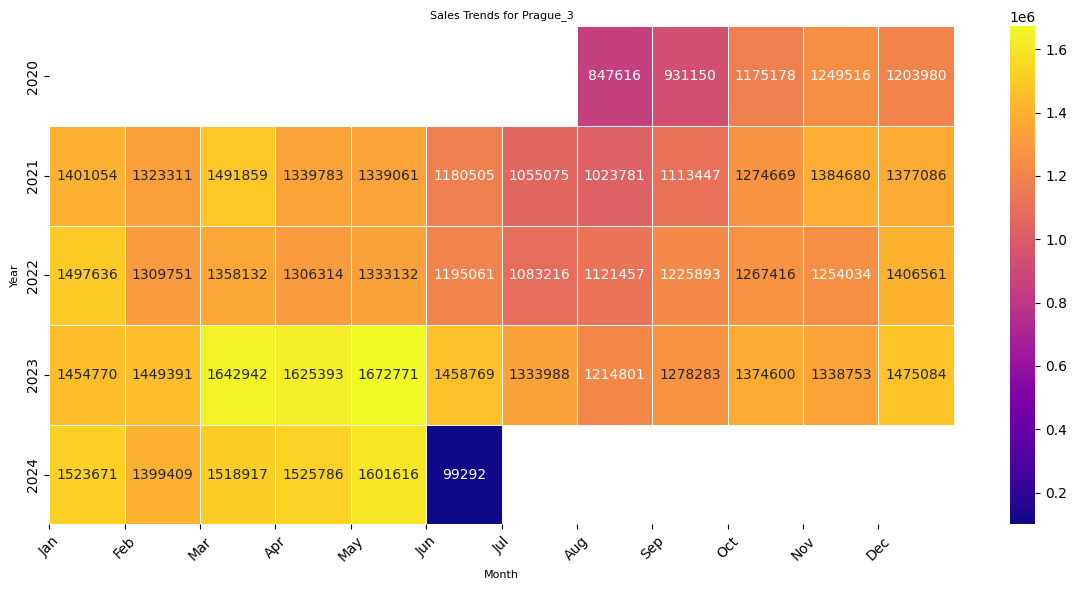

In [35]:
warehouses = df_sales_heatmap['warehouse'].unique()
for warehouse in warehouses:
    warehouse_data = df_sales_heatmap[df_sales_heatmap['warehouse'] == warehouse]
    heatmap_data = warehouse_data.pivot(index="year", columns="month_num", values="sales")

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        heatmap_data,
        annot=True, fmt=".0f", cmap="plasma", linewidths=0.5, cbar=True
    )

    plt.title(f"Sales Trends for {warehouse}", fontsize=8)
    plt.xlabel("Month", fontsize=8)
    plt.ylabel("Year", fontsize=8)
    plt.xticks(
        ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
        rotation=45, fontsize=10
    )
    plt.yticks(fontsize=10)

    plt.tight_layout()
    plt.show()

Calculating Weekly Sales Ratios   
Visualization of Weekly Sales Ratio by Day of Week

In [36]:
df = df_sales_train_inventory_extra.copy()
df['iso_year'] = df['date'].dt.isocalendar().year
df['iso_week'] = df['date'].dt.isocalendar().week
df['week_id'] = df['iso_year'].astype(str) + '-W' + df['iso_week'].astype(str).str.zfill(2)
df['day_of_week'] = df['date'].dt.dayofweek

weekly_total = df.groupby('week_id')['sales'].sum().reset_index()
weekly_total.rename(columns={'sales': 'weekly_total_sales'}, inplace=True)

df = pd.merge(df, weekly_total, on='week_id')

# Calculate daily sales ratio as a percentage of weekly total sales
df['daily_sales_ratio'] = df['sales'] / df['weekly_total_sales']

# Aggregate weekly ratios by day of the week
weekly_ratio = df.groupby(['week_id', 'day_of_week'])['daily_sales_ratio'].sum().reset_index()

# Get the start date for each week (Monday)
weekly_ratio['week_start'] = pd.to_datetime(weekly_ratio['week_id'] + '-1', format='%Y-W%W-%w')
first_monday = weekly_ratio['week_start'].min()

In [37]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
colors = px.colors.sequential.Plasma_r

fig = go.Figure()

# Loop through each day and add traces
for day in range(7):
    day_data = weekly_ratio[weekly_ratio['day_of_week'] == day]

    fig.add_trace(go.Scatter(
        x=day_data['week_start'],
        y=day_data['daily_sales_ratio'],
        mode='lines+markers',  # Line with markers
        name=days[day],  # Legend label
        line=dict(color=colors[day]),  # Assign color from Plasma_r palette
        marker=dict(size=6)
    ))

# Update layout for better formatting
fig.update_layout(
    title="Weekly Sales Ratio by Day of Week",
    xaxis_title="Week Start Date (Monday)",
    yaxis_title="Daily Sales Ratio (Percentage of Weekly Total)",
    legend_title="Day of Week",
    xaxis=dict(tickangle=-45),  # Rotate x-axis labels
    yaxis=dict(range=[0, 0.3]),  # Set y-axis limit
    template="plotly_white",  # Clean background style
    width=900,
    height=500
)

# Show plot
fig.show()

separate chart for each warehouse

In [38]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
colors = px.colors.sequential.Plasma_r

df = df_sales_train_inventory_extra.copy()
df['iso_year'] = df['date'].dt.isocalendar().year
df['iso_week'] = df['date'].dt.isocalendar().week
df['week_id'] = df['iso_year'].astype(str) + '-W' + df['iso_week'].astype(str).str.zfill(2)
df['day_of_week'] = df['date'].dt.dayofweek

warehouses = df['warehouse'].unique()
for warehouse in warehouses:
    warehouse_data = df[df['warehouse'] == warehouse]

    weekly_total = warehouse_data.groupby('week_id')['sales'].sum().reset_index()
    weekly_total.rename(columns={'sales': 'weekly_total_sales'}, inplace=True)
    warehouse_data = pd.merge(warehouse_data, weekly_total, on='week_id')

    warehouse_data['daily_sales_ratio'] = warehouse_data['sales'] / warehouse_data['weekly_total_sales']

    weekly_ratio = warehouse_data.groupby(['week_id', 'day_of_week'])['daily_sales_ratio'].sum().reset_index()
    weekly_ratio['week_start'] = pd.to_datetime(weekly_ratio['week_id'] + '-1', format='%Y-W%W-%w')
    fig = go.Figure()

    # Loop through each day of the week and add traces
    for day in range(7):
        day_data = weekly_ratio[weekly_ratio['day_of_week'] == day]

        fig.add_trace(go.Scatter(
            x=day_data['week_start'],
            y=day_data['daily_sales_ratio'],
            mode='lines+markers',  # Line with markers
            name=days[day],  # Legend label
            line=dict(color=colors[day]),  # Assign color from Plasma_r palette
            marker=dict(size=6)
        ))

    fig.update_layout(
        title=f"Weekly Sales Ratio by Day of Week - {warehouse}",
        xaxis_title="Week Start Date (Monday)",
        yaxis_title="Daily Sales Ratio (Percentage of Weekly Total)",
        legend_title="Day of Week",
        xaxis=dict(tickangle=-45),
        yaxis=dict(range=[0, 0.3]),  # Keep y-axis consistent
        template="plotly_white",
        width=900,
        height=500
    )
    fig.show()

Total Sales by Day of the Week

In [39]:
df_day_of_week = df.groupby(["warehouse", "day_of_week"])["sales"].sum().reset_index()

In [40]:
warehouses = ['Brno_1', 'Prague_1', 'Prague_2', 'Prague_3', 'Budapest_1', 'Munich_1', 'Frankfurt_1']
for warehouse in warehouses:
    warehouse_data = df_day_of_week[df_day_of_week['warehouse'] == warehouse]
    fig = px.bar(
        warehouse_data,
        x="day_of_week",
        y="sales",
        color="day_of_week",
        title=f"Total Sales by Day of the Week - {warehouse}"
    )
    fig.show()

In [41]:
df["month_num"] = df["date"].dt.month
df_monthly_day_sales = df.groupby(["warehouse", "day_of_week", 'month_num'])["sales"].sum().reset_index()
for warehouse in warehouses:
    warehouse_data = df_monthly_day_sales[df_monthly_day_sales['warehouse'] == warehouse]
    heatmap_data = warehouse_data.pivot(index="day_of_week", columns="month_num", values="sales")
    heatmap_data.index = days[:len(heatmap_data)]

    fig = px.imshow(
        heatmap_data.values,
        labels=dict(x="Month", y="Day of the Week", color="Total Sales"),
        x=heatmap_data.columns,
        y=heatmap_data.index,
        color_continuous_scale="plasma",
        title=f"Aggregate Sales by Month and Day of Week - {warehouse}"
    )

    fig.update_layout(
        xaxis_title="Month",
        yaxis_title="Day of the Week",
        xaxis=dict(tickmode="array", tickvals=list(range(12)),
                   ticktext=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]),
        yaxis=dict(tickmode="array", tickvals=list(range(len(days))), ticktext=days),
        template="plotly_white",
        width=800,
        height=500
    )

    # Show the heatmap for each warehouse
    fig.show()

discount corr

In [42]:
df

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,...,month,product_unique_id,L1_category_name_en,warehouse_inventory,year,month_num,iso_year,iso_week,week_id,day_of_week
0,2346,2020-08-01,Prague_1,4086.0,55.12,25.29,0.63,0.0,0.0,0.0,...,2020-08,1172,Bakery,Prague_1,2020,8,2020,31,2020-W31,5
1,2052,2020-08-01,Prague_2,2424.0,4.41,29.45,1.00,0.0,0.0,0.0,...,2020-08,1039,Fruit and vegetable,Prague_2,2020,8,2020,31,2020-W31,5
2,619,2020-08-01,Prague_1,4111.0,327.07,40.01,1.00,0.0,0.0,0.0,...,2020-08,316,Fruit and vegetable,Prague_1,2020,8,2020,31,2020-W31,5
3,505,2020-08-01,Prague_2,2424.0,43.60,58.73,1.00,0.0,0.0,0.0,...,2020-08,263,Fruit and vegetable,Prague_2,2020,8,2020,31,2020-W31,5
4,1531,2020-08-01,Prague_3,2416.0,4.44,19.84,0.60,0.0,0.0,0.0,...,2020-08,778,Bakery,Prague_3,2020,8,2020,31,2020-W31,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007414,5033,2024-06-02,Brno_1,8091.0,16.12,57.99,0.82,0.0,0.0,0.0,...,2024-06,2465,Fruit and vegetable,Brno_1,2024,6,2024,22,2024-W22,6
4007415,342,2024-06-02,Prague_2,5753.0,274.29,39.71,1.00,0.0,0.0,0.0,...,2024-06,174,Fruit and vegetable,Prague_2,2024,6,2024,22,2024-W22,6
4007416,497,2024-06-02,Prague_3,5177.0,16.92,14.57,1.00,0.0,0.0,0.0,...,2024-06,258,Fruit and vegetable,Prague_3,2024,6,2024,22,2024-W22,6
4007417,1561,2024-06-02,Brno_1,8091.0,67.70,54.27,1.00,0.0,0.0,0.0,...,2024-06,793,Bakery,Brno_1,2024,6,2024,22,2024-W22,6


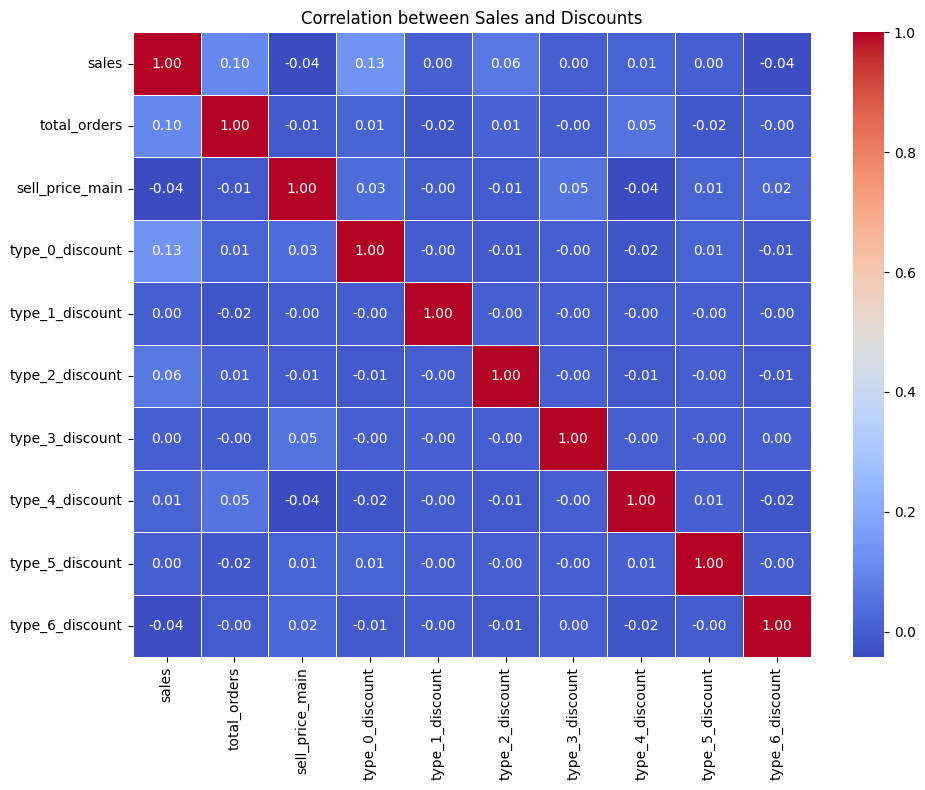

In [43]:
num_columns = [
                'sales',
                'total_orders',
                'sell_price_main',
                'type_0_discount',
                'type_1_discount',
                'type_2_discount',
                'type_3_discount',
                'type_4_discount',
                'type_5_discount',
                'type_6_discount'
                ]

corr_matrix = df[num_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Sales and Discounts")
plt.tight_layout()
plt.show()

In [44]:
fig_hist = px.histogram(
    df,
    x="sales",
    color="warehouse",
    barmode="stack",
    marginal="box",  # Add a boxplot on the side
    title="Sales Distribution by Warehouse",
    labels={"sales": "Sales", "warehouse": "Warehouse"}
)
fig_hist.update_layout(
    xaxis_title="Sales",
    yaxis_title="Frequency",
    template="plotly_white",
)
fig_hist.show()

## Creating a final DataFrame


In [ ]:
df_sales_train = pd.read_csv('sales_train.csv')
df_sales_test = pd.read_csv('sales_test.csv')

df_inventory = pd.read_csv('inventory.csv')
df_test_weights = pd.read_csv('test_weights.csv')

df_calendar = pd.read_csv('calendar.csv')

In [ ]:
df_sales_train.shape

In [ ]:
df_test_weights.head()

In [ ]:
df_test_weights.unique_id.max()

In [ ]:
df_inventory.unique_id.max()

In [ ]:
df_inventory_weights = pd.merge(
    df_inventory,
    df_test_weights,
    how='left',
    on='unique_id'
)


In [ ]:
df_sales_train.date.min()

In [ ]:
df_sales_train.date.max()

# Calendar

In [ ]:
# calendar
df_calendar.groupby(['warehouse', 'date'])['winter_school_holidays'].value_counts().reset_index()[:40]

In [ ]:
df_calendar[df_calendar.winter_school_holidays == 1].groupby(['warehouse', 'date'])['school_holidays'].count().reset_index()[:30]

In [ ]:
df_calendar.warehouse.unique()

In [ ]:
school_holidays_cz = [
    {"Year": 2020, "Holiday": "Autumn Holidays", "Start Date": "2020-10-29", "End Date": "2020-10-30"},
    {"Year": 2020, "Holiday": "Christmas Holidays", "Start Date": "2020-12-23", "End Date": "2021-01-03"},
    {"Year": 2021, "Holiday": "Mid-Year Holiday", "Start Date": "2021-01-29", "End Date": "2021-01-29"},
    {"Year": 2021, "Holiday": "Spring Break", "Start Date": "2021-02-08", "End Date": "2021-02-14"},
    {"Year": 2021, "Holiday": "Easter Holidays", "Start Date": "2021-04-01", "End Date": "2021-04-02"},
    {"Year": 2021, "Holiday": "Summer Holidays", "Start Date": "2021-07-01", "End Date": "2021-08-31"},
    {"Year": 2021, "Holiday": "Autumn Holidays", "Start Date": "2021-10-27", "End Date": "2021-10-29"},
    {"Year": 2021, "Holiday": "Christmas Holidays", "Start Date": "2021-12-23", "End Date": "2022-01-02"},
    {"Year": 2022, "Holiday": "Mid-Year Holiday", "Start Date": "2022-02-04", "End Date": "2022-02-04"},
    {"Year": 2022, "Holiday": "Spring Break", "Start Date": "2022-02-07", "End Date": "2022-02-13"},
    {"Year": 2022, "Holiday": "Easter Holidays", "Start Date": "2022-04-14", "End Date": "2022-04-15"},
    {"Year": 2022, "Holiday": "Summer Holidays", "Start Date": "2022-07-01", "End Date": "2022-08-31"},
    {"Year": 2022, "Holiday": "Autumn Holidays", "Start Date": "2022-10-26", "End Date": "2022-10-27"},
    {"Year": 2022, "Holiday": "Christmas Holidays", "Start Date": "2022-12-23", "End Date": "2023-01-02"},
    {"Year": 2023, "Holiday": "Mid-Year Holiday", "Start Date": "2023-02-03", "End Date": "2023-02-03"},
    {"Year": 2023, "Holiday": "Spring Break", "Start Date": "2023-02-13", "End Date": "2023-02-19"},
    {"Year": 2023, "Holiday": "Easter Holidays", "Start Date": "2023-04-06", "End Date": "2023-04-07"},
    {"Year": 2023, "Holiday": "Summer Holidays", "Start Date": "2023-07-01", "End Date": "2023-08-31"},
    {"Year": 2023, "Holiday": "Autumn Holidays", "Start Date": "2023-10-26", "End Date": "2023-10-27"},
    {"Year": 2023, "Holiday": "Christmas Holidays", "Start Date": "2023-12-23", "End Date": "2024-01-02"},
    {"Year": 2024, "Holiday": "Mid-Year Holiday", "Start Date": "2024-02-02", "End Date": "2024-02-02"},
    {"Year": 2024, "Holiday": "Spring Break", "Start Date": "2024-02-12", "End Date": "2024-02-18"},
    {"Year": 2024, "Holiday": "Easter Holidays", "Start Date": "2024-03-28", "End Date": "2024-03-29"},
    {"Year": 2024, "Holiday": "Summer Holidays", "Start Date": "2024-07-01", "End Date": "2024-08-31"},
    {"Year": 2024, "Holiday": "Autumn Holidays", "Start Date": "2024-10-24", "End Date": "2024-10-25"},
    {"Year": 2024, "Holiday": "Christmas Holidays", "Start Date": "2024-12-23", "End Date": "2025-01-03"},
    {"Year": 2025, "Holiday": "Mid-Year Holiday", "Start Date": "2025-01-31", "End Date": "2025-01-31"},
    {"Year": 2025, "Holiday": "Spring Break", "Start Date": "2025-02-10", "End Date": "2025-02-16"},
    {"Year": 2025, "Holiday": "Easter Holidays", "Start Date": "2025-04-17", "End Date": "2025-04-18"},
    {"Year": 2025, "Holiday": "Summer Holidays", "Start Date": "2025-07-01", "End Date": "2025-08-31"},
    {"Year": 2025, "Holiday": "Autumn Holidays", "Start Date": "2025-10-27", "End Date": "2025-10-29"},
    {"Year": 2025, "Holiday": "Christmas Holidays", "Start Date": "2025-12-22", "End Date": "2026-01-02"}
]
df_cz = pd.DataFrame(school_holidays_cz)
df_cz["Start Date"] = pd.to_datetime(df_cz["Start Date"])
df_cz["End Date"] = pd.to_datetime(df_cz["End Date"])

school_holidays_de_m = [
    {"Year": 2020, "Holiday": "Winter Holidays", "Start Date": "2020-02-24", "End Date": "2020-02-28"},
    {"Year": 2020, "Holiday": "Easter Holidays", "Start Date": "2020-04-06", "End Date": "2020-04-18"},
    {"Year": 2020, "Holiday": "Pentecost Holidays", "Start Date": "2020-06-02", "End Date": "2020-06-13"},
    {"Year": 2020, "Holiday": "Summer Holidays", "Start Date": "2020-07-27", "End Date": "2020-09-07"},
    {"Year": 2020, "Holiday": "Autumn Holidays", "Start Date": "2020-10-31", "End Date": "2020-11-06"},
    {"Year": 2020, "Holiday": "Christmas Holidays", "Start Date": "2020-12-23", "End Date": "2021-01-09"},
    {"Year": 2021, "Holiday": "Winter Holidays", "Start Date": "2021-02-15", "End Date": "2021-02-19"},
    {"Year": 2021, "Holiday": "Easter Holidays", "Start Date": "2021-03-29", "End Date": "2021-04-10"},
    {"Year": 2021, "Holiday": "Pentecost Holidays", "Start Date": "2021-05-25", "End Date": "2021-06-04"},
    {"Year": 2021, "Holiday": "Summer Holidays", "Start Date": "2021-07-30", "End Date": "2021-09-13"},
    {"Year": 2021, "Holiday": "Autumn Holidays", "Start Date": "2021-11-02", "End Date": "2021-11-05"},
    {"Year": 2021, "Holiday": "Christmas Holidays", "Start Date": "2021-12-24", "End Date": "2022-01-08"},
    {"Year": 2022, "Holiday": "Winter Holidays", "Start Date": "2022-02-28", "End Date": "2022-03-04"},
    {"Year": 2022, "Holiday": "Easter Holidays", "Start Date": "2022-04-11", "End Date": "2022-04-23"},
    {"Year": 2022, "Holiday": "Pentecost Holidays", "Start Date": "2022-06-07", "End Date": "2022-06-18"},
    {"Year": 2022, "Holiday": "Summer Holidays", "Start Date": "2022-08-01", "End Date": "2022-09-12"},
    {"Year": 2022, "Holiday": "Autumn Holidays", "Start Date": "2022-10-31", "End Date": "2022-11-04"},
    {"Year": 2022, "Holiday": "Christmas Holidays", "Start Date": "2022-12-24", "End Date": "2023-01-07"},
    {"Year": 2023, "Holiday": "Winter Holidays", "Start Date": "2023-02-20", "End Date": "2023-02-24"},
    {"Year": 2023, "Holiday": "Easter Holidays", "Start Date": "2023-04-03", "End Date": "2023-04-15"},
    {"Year": 2023, "Holiday": "Pentecost Holidays", "Start Date": "2023-05-30", "End Date": "2023-06-09"},
    {"Year": 2023, "Holiday": "Summer Holidays", "Start Date": "2023-07-31", "End Date": "2023-09-11"},
    {"Year": 2023, "Holiday": "Autumn Holidays", "Start Date": "2023-10-30", "End Date": "2023-11-03"},
    {"Year": 2023, "Holiday": "Christmas Holidays", "Start Date": "2023-12-23", "End Date": "2024-01-05"},
    {"Year": 2024, "Holiday": "Spring Holidays", "Start Date": "2024-02-12", "End Date": "2024-02-16"},
    {"Year": 2024, "Holiday": "Easter Holidays", "Start Date": "2024-03-25", "End Date": "2024-04-06"},
    {"Year": 2024, "Holiday": "Pentecost Holidays", "Start Date": "2024-05-21", "End Date": "2024-06-01"},
    {"Year": 2024, "Holiday": "Summer Holidays", "Start Date": "2024-07-29", "End Date": "2024-09-09"},
    {"Year": 2024, "Holiday": "Autumn Holidays", "Start Date": "2024-10-28", "End Date": "2024-10-31"},
    {"Year": 2024, "Holiday": "Christmas Holidays", "Start Date": "2024-12-23", "End Date": "2025-01-03"},
    {"Year": 2025, "Holiday": "Spring Holidays", "Start Date": "2025-03-03", "End Date": "2025-03-07"},
    {"Year": 2025, "Holiday": "Easter Holidays", "Start Date": "2025-04-14", "End Date": "2025-04-25"},
    {"Year": 2025, "Holiday": "Pentecost Holidays", "Start Date": "2025-06-09", "End Date": "2025-06-20"},
    {"Year": 2025, "Holiday": "Summer Holidays", "Start Date": "2025-08-01", "End Date": "2025-09-15"},
    {"Year": 2025, "Holiday": "Autumn Holidays", "Start Date": "2025-10-28", "End Date": "2025-11-01"},
    {"Year": 2025, "Holiday": "Christmas Holidays", "Start Date": "2025-12-22", "End Date": "2026-01-05"}
]

df_de_m = pd.DataFrame(school_holidays_de_m)
df_de_m["Start Date"] = pd.to_datetime(df_de_m["Start Date"])
df_de_m["End Date"] = pd.to_datetime(df_de_m["End Date"])

school_holidays_de_f = [
    {"Year": 2020, "Holiday": "Autumn Holidays", "Start Date": "2020-10-05", "End Date": "2020-10-17"},
    {"Year": 2020, "Holiday": "Christmas Holidays", "Start Date": "2020-12-21", "End Date": "2021-01-09"},
    {"Year": 2021, "Holiday": "Easter Holidays", "Start Date": "2021-04-06", "End Date": "2021-04-16"},
    {"Year": 2021, "Holiday": "Summer Holidays", "Start Date": "2021-07-19", "End Date": "2021-08-27"},
    {"Year": 2021, "Holiday": "Autumn Holidays", "Start Date": "2021-10-11", "End Date": "2021-10-23"},
    {"Year": 2021, "Holiday": "Christmas Holidays", "Start Date": "2021-12-23", "End Date": "2022-01-08"},
    {"Year": 2022, "Holiday": "Easter Holidays", "Start Date": "2022-04-11", "End Date": "2022-04-23"},
    {"Year": 2022, "Holiday": "Summer Holidays", "Start Date": "2022-07-25", "End Date": "2022-09-02"},
    {"Year": 2022, "Holiday": "Autumn Holidays", "Start Date": "2022-10-24", "End Date": "2022-10-29"},
    {"Year": 2022, "Holiday": "Christmas Holidays", "Start Date": "2022-12-22", "End Date": "2023-01-07"},
    {"Year": 2023, "Holiday": "Easter Holidays", "Start Date": "2023-04-03", "End Date": "2023-04-22"},
    {"Year": 2023, "Holiday": "Summer Holidays", "Start Date": "2023-07-24", "End Date": "2023-09-01"},
    {"Year": 2023, "Holiday": "Autumn Holidays", "Start Date": "2023-10-23", "End Date": "2023-10-28"},
    {"Year": 2023, "Holiday": "Christmas Holidays", "Start Date": "2023-12-21", "End Date": "2024-01-06"},
    {"Year": 2024, "Holiday": "Easter Holidays", "Start Date": "2024-03-25", "End Date": "2024-04-06"},
    {"Year": 2024, "Holiday": "Summer Holidays", "Start Date": "2024-07-15", "End Date": "2024-08-23"},
    {"Year": 2024, "Holiday": "Autumn Holidays", "Start Date": "2024-10-14", "End Date": "2024-10-25"},
    {"Year": 2024, "Holiday": "Christmas Holidays", "Start Date": "2024-12-23", "End Date": "2025-01-10"},
    {"Year": 2025, "Holiday": "Easter Holidays", "Start Date": "2025-04-07", "End Date": "2025-04-21"},
    {"Year": 2025, "Holiday": "Summer Holidays", "Start Date": "2025-07-07", "End Date": "2025-08-15"},
    {"Year": 2025, "Holiday": "Autumn Holidays", "Start Date": "2025-10-06", "End Date": "2025-10-18"},
    {"Year": 2025, "Holiday": "Christmas Holidays", "Start Date": "2025-12-22", "End Date": "2026-01-10"}
]

df_de_f = pd.DataFrame(school_holidays_de_f)
df_de_f["Start Date"] = pd.to_datetime(df_de_f["Start Date"])
df_de_f["End Date"] = pd.to_datetime(df_de_f["End Date"])

import pandas as pd

school_holidays_hu = [
    {"Year": 2020, "Holiday": "Autumn Holidays", "Start Date": "2020-10-26", "End Date": "2020-10-31"},
    {"Year": 2020, "Holiday": "Christmas Holidays", "Start Date": "2020-12-21", "End Date": "2021-01-05"},
    {"Year": 2021, "Holiday": "Easter Holidays", "Start Date": "2021-04-01", "End Date": "2021-04-06"},
    {"Year": 2021, "Holiday": "Summer Holidays", "Start Date": "2021-06-16", "End Date": "2021-08-31"},
    {"Year": 2021, "Holiday": "Autumn Holidays", "Start Date": "2021-10-25", "End Date": "2021-10-30"},
    {"Year": 2021, "Holiday": "Christmas Holidays", "Start Date": "2021-12-22", "End Date": "2022-01-02"},
    {"Year": 2022, "Holiday": "Easter Holidays", "Start Date": "2022-04-14", "End Date": "2022-04-19"},
    {"Year": 2022, "Holiday": "Summer Holidays", "Start Date": "2022-06-16", "End Date": "2022-08-31"},
    {"Year": 2022, "Holiday": "Autumn Holidays", "Start Date": "2022-10-31", "End Date": "2022-11-06"},
    {"Year": 2022, "Holiday": "Christmas Holidays", "Start Date": "2022-12-22", "End Date": "2023-01-02"},
    {"Year": 2023, "Holiday": "Easter Holidays", "Start Date": "2023-04-06", "End Date": "2023-04-11"},
    {"Year": 2023, "Holiday": "Summer Holidays", "Start Date": "2023-06-16", "End Date": "2023-08-31"},
    {"Year": 2023, "Holiday": "Autumn Holidays", "Start Date": "2023-10-30", "End Date": "2023-11-05"},
    {"Year": 2023, "Holiday": "Christmas Holidays", "Start Date": "2023-12-21", "End Date": "2024-01-02"},
    {"Year": 2024, "Holiday": "Easter Holidays", "Start Date": "2024-04-17", "End Date": "2024-04-25"},
    {"Year": 2024, "Holiday": "Summer Holidays", "Start Date": "2024-06-16", "End Date": "2024-08-31"},
    {"Year": 2024, "Holiday": "Autumn Holidays", "Start Date": "2024-10-28", "End Date": "2024-11-03"},
    {"Year": 2024, "Holiday": "Christmas Holidays", "Start Date": "2024-12-23", "End Date": "2025-01-02"},
    {"Year": 2025, "Holiday": "Easter Holidays", "Start Date": "2025-04-17", "End Date": "2025-04-25"},
    {"Year": 2025, "Holiday": "Summer Holidays", "Start Date": "2025-06-16", "End Date": "2025-08-31"},
    {"Year": 2025, "Holiday": "Autumn Holidays", "Start Date": "2025-10-27", "End Date": "2025-11-02"},
    {"Year": 2025, "Holiday": "Christmas Holidays", "Start Date": "2025-12-22", "End Date": "2026-01-02"}
]

df_hu = pd.DataFrame(school_holidays_hu)
df_hu["Start Date"] = pd.to_datetime(df_hu["Start Date"])
df_hu["End Date"] = pd.to_datetime(df_hu["End Date"])

In [ ]:
df_hu

In [ ]:
df_calendar_short = df_calendar[df_calendar['date'] >= df_sales_train.date.min()][:]
df_calendar_short.sort_values(by='date', inplace=True)
df_calendar_short.head()

In [ ]:
warehouse_to_country = {
    'Brno_1': 'Czech Republic',
    'Prague_2': 'Czech Republic',
    'Prague_3': 'Czech Republic',
    'Munich_1': 'Germany',
    'Budapest_1': 'Hungary',
    'Frankfurt_1': 'Germany',
    'Prague_1': 'Czech Republic',
}

country_to_country_code = {
    "Germany": "DE",
    "Czech Republic": "CZ",
    "Czech Republic": "CZ",
    "Germany": "DE",
    "Czech Republic": "CZ",
    "Czech Republic": "CZ",
    "Hungary": "HU",
}

# Add a 'country' column based on the warehouse location
df_calendar_short['country'] = df_calendar_short['warehouse'].map(warehouse_to_country)
df_calendar_short['country_code'] = df_calendar_short['country'].map(country_to_country_code)

In [ ]:
df_calendar_short["school_holiday_custom"] = 0

# Apply for Hungary
df_calendar_short.loc[
    df_calendar_short["country"] == "Hungary", "school_holiday_custom"
] = df_calendar_short.loc[
    df_calendar_short["country"] == "Hungary"
].apply(
    lambda row: 1 if any(
        (row["date"] >= df_hu["Start Date"]) & (row["date"] <= df_hu["End Date"])
    ) else 0, axis=1
)

# Apply for Frankfurt
df_calendar_short.loc[
    df_calendar_short["warehouse"] == "Frankfurt_1", "school_holiday_custom"
] = df_calendar_short.loc[
    df_calendar_short["warehouse"] == "Frankfurt_1"
].apply(
    lambda row: 1 if any(
        (row["date"] >= df_de_f["Start Date"]) & (row["date"] <= df_de_f["End Date"])
    ) else df_calendar_short.loc[row.name, "school_holiday_custom"],  # Keep existing values
    axis=1
)

# Apply for Munich
df_calendar_short.loc[
    df_calendar_short["warehouse"] == "Munich_1", "school_holiday_custom"
] = df_calendar_short.loc[
    df_calendar_short["warehouse"] == "Munich_1"
].apply(
    lambda row: 1 if any(
        (row["date"] >= df_de_m["Start Date"]) & (row["date"] <= df_de_m["End Date"])
    ) else df_calendar_short.loc[row.name, "school_holiday_custom"],  # Keep existing values
    axis=1
)

# Apply for Czech Republic
df_calendar_short.loc[
    df_calendar_short["country"] == "Czech Republic", "school_holiday_custom"
] = df_calendar_short.loc[
    df_calendar_short["country"] == "Czech Republic"
].apply(
    lambda row: 1 if any(
        (row["date"] >= df_cz["Start Date"]) & (row["date"] <= df_cz["End Date"])
    ) else 0, axis=1
)


df_calendar_short["holiday_next_3_days"] = df_calendar_short.groupby("warehouse")["holiday"].transform(
    lambda x: x.shift(-3).rolling(window=3, min_periods=1).max()
).fillna(0).astype(int)

df_calendar_short["holiday_next_1_days"] = df_calendar_short.groupby("warehouse")["holiday"].transform(
    lambda x: x.shift(-1)
).fillna(0).astype(int)

In [ ]:
df_calendar_short.head()

In [ ]:
df_sales_train.date = pd.to_datetime(df_sales_train.date)
df_sales_test.date = pd.to_datetime(df_sales_test.date)
df_calendar_short.date = pd.to_datetime(df_calendar_short.date)

df_sales_train_calendar = pd.merge(
    df_sales_train,
    df_calendar_short[['date',
                 'holiday',
                 'shops_closed',
                 'winter_school_holidays',
                 'school_holidays',
                 'school_holiday_custom',
                 'holiday_next_3_days',
                 'holiday_next_1_days',
                 'warehouse']],
    how='left',
    on=['date', 'warehouse']
)
print(df_sales_train_calendar.shape)
df_sales_test_calendar = pd.merge(
    df_sales_test,
    df_calendar_short[['date',
                 'holiday',
                 'shops_closed',
                 'winter_school_holidays',
                 'school_holidays',
                 'school_holiday_custom',
                 'holiday_next_3_days',
                 'holiday_next_1_days',
                 'warehouse']],
    how='left',
    on=['date', 'warehouse']
)

In [ ]:
df_inventory_weights[['unique_id',
                      'name',
                      'L1_category_name_en',
                      'L2_category_name_en',
                      'L3_category_name_en',
                      'L4_category_name_en',
                      'weight']]

df_sales_train_calendar_inventory = pd.merge(
    df_sales_train_calendar,
    df_inventory_weights[[
        'unique_id',
        'name',
        'L1_category_name_en',
        'L2_category_name_en',
        'L3_category_name_en',
        'L4_category_name_en',
        'weight']],
    how='left',
    on='unique_id'
)
print(df_sales_train_calendar_inventory.shape)
df_sales_test_calendar_inventory = pd.merge(
    df_sales_test_calendar,
    df_inventory_weights[[
        'unique_id',
        'name',
        'L1_category_name_en',
        'L2_category_name_en',
        'L3_category_name_en',
        'L4_category_name_en',
        'weight']],
    how='left',
    on='unique_id'
)

In [ ]:
print(df_sales_train_calendar_inventory.shape[0] == df_sales_train.shape[0])
print(df_sales_test_calendar_inventory.shape[0] == df_sales_test.shape[0])

## Product Category Information

In [ ]:
df_sales_train_calendar_inventory

In [ ]:
train_ids = set(df_sales_train_calendar_inventory['name'])
test_ids = set(df_sales_test_calendar_inventory['name'])

# Find IDs in test but not in train
test_not_in_train = test_ids - train_ids

df_test_not_in_train = df_sales_test_calendar_inventory[
    df_sales_test_calendar_inventory['name'].isin(test_not_in_train)
    ]
print(df_test_not_in_train.name.unique())
print(df_test_not_in_train.name.nunique())

In [ ]:
df_sales_train_calendar_inventory[
    (df_sales_train_calendar_inventory.warehouse == 'Brno_1') & \
    (df_sales_train_calendar_inventory.name == 'Chicken_99')
    ]

In [ ]:
df_sales_test_calendar_inventory[
    (df_sales_test_calendar_inventory.warehouse == 'Brno_1') & \
    (df_sales_test_calendar_inventory.name == 'Chicken_99')
    ]

In [ ]:
df_sales_train_calendar_inventory.isna().sum()

In [ ]:
df_sales_train_calendar_inventory[df_sales_train_calendar_inventory.isna().any(axis=1)]

In [ ]:
def cramers_v(cat_feature, num_feature):
    cross_tab = pd.crosstab(df_sales_train_calendar_inventory[cat_feature],
                            pd.qcut(df_sales_train_calendar_inventory[num_feature], q=4)
                            )
    chi2 = stats.chi2_contingency(cross_tab)[0]
    n = df_sales_train_calendar_inventory.shape[0]
    r, k = cross_tab.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v_name = cramers_v("name", "total_orders")
print(f"Cramér's V for 'name' vs 'total_orders': {cramers_v_name}")

cramers_v_cat = cramers_v("L1_category_name_en", "total_orders")
print(f"Cramér's V for 'L1_category_name_en' vs 'total_orders': {cramers_v_cat}")

In [ ]:
correlation, p_value = stats.pointbiserialr(df_sales_train_calendar_inventory.dropna()['holiday'],
                                            df_sales_train_calendar_inventory.dropna()['sales']
                                            )

print(f"Point-Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

In [ ]:
df_sales_train_calendar_inventory.duplicated().sum()

In [ ]:
df_sales_train_calendar_inventory.shape

In [ ]:
df_sales_test_calendar_inventory.shape

In [ ]:
df_sales_train_calendar_inventory.to_csv('df_sales_train_all_final.csv', index=False)
df_sales_test_calendar_inventory.to_csv('df_sales_test_all_final.csv', index=False)